In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [11]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["score_difference", "type.id", "relative_strength", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [18]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  NaN foun

In [23]:
# Get information about the data
training_data = dict(sorted(training_data.items()))
for timestep in training_data:
    print(f"timestep: {timestep}, number of instances: {len(training_data[timestep])}")

timestep: 0.0, number of instances: 4384
timestep: 0.005, number of instances: 918
timestep: 0.01, number of instances: 2741
timestep: 0.015, number of instances: 1546
timestep: 0.02, number of instances: 2043
timestep: 0.025, number of instances: 2180
timestep: 0.03, number of instances: 1949
timestep: 0.035, number of instances: 2237
timestep: 0.04, number of instances: 1970
timestep: 0.045, number of instances: 2215
timestep: 0.05, number of instances: 1981
timestep: 0.055, number of instances: 2306
timestep: 0.06, number of instances: 2125
timestep: 0.065, number of instances: 2140
timestep: 0.07, number of instances: 2100
timestep: 0.075, number of instances: 2176
timestep: 0.08, number of instances: 2226
timestep: 0.085, number of instances: 2122
timestep: 0.09, number of instances: 2222
timestep: 0.095, number of instances: 2059
timestep: 0.1, number of instances: 2337
timestep: 0.105, number of instances: 2117
timestep: 0.11, number of instances: 2250
timestep: 0.115, number of

In [28]:
for timestep in test_data:
    print(f"timestep: {timestep}, number of instances: {len(test_data[timestep])}")

timestep: 0.0, number of instances: 343
timestep: 0.005, number of instances: 426
timestep: 0.01, number of instances: 373
timestep: 0.015, number of instances: 476
timestep: 0.02, number of instances: 378
timestep: 0.025, number of instances: 481
timestep: 0.03, number of instances: 418
timestep: 0.035, number of instances: 455
timestep: 0.04, number of instances: 476
timestep: 0.045, number of instances: 430
timestep: 0.05, number of instances: 468
timestep: 0.055, number of instances: 501
timestep: 0.06, number of instances: 466
timestep: 0.065, number of instances: 470
timestep: 0.07, number of instances: 459
timestep: 0.075, number of instances: 500
timestep: 0.08, number of instances: 477
timestep: 0.085, number of instances: 437
timestep: 0.09, number of instances: 522
timestep: 0.095, number of instances: 464
timestep: 0.1, number of instances: 503
timestep: 0.105, number of instances: 474
timestep: 0.11, number of instances: 477
timestep: 0.115, number of instances: 458
timest

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# Define which features to scale vs. passthrough
numeric_features = [
    "homeScore", "awayScore", "start.down", "start.distance", "start.yardLine",
    "end.down", "end.distance", "end.yardLine",
]
other_features = ["relative_strength", "scoringPlay", "home_has_possession", "home_timeouts_left", "away_timeouts_left"] # for timestep in training_data.keys():


numeric_feature_indices = [
    0,  # score_difference
    1,  # relative_strength  
    4,  # end.down
    5,  # end.yardsToEndzone
    6,  # end.distance
    7,  # field_position_shift
]

# Features that should NOT be scaled (categorical/binary/discrete)
other_feature_indices = [
    2,  # type.id (categorical)
    3,  # home_has_possession (binary)
    8,  # home_timeouts_left (discrete 0-3)
    9,  # away_timeouts_left (discrete 0-3)
]

print("Features to be scaled:", numeric_features)
print("Features to passthrough:", other_features)

# Scale the data pipeline (using column indices for numpy arrays)
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_feature_indices),
    ("passthrough", "passthrough", other_feature_indices)
])

# No scaling pipeline (for comparison)
preprocessor_no_scaling = ColumnTransformer(transformers=[
    ("passthrough", "passthrough", list(range(len(features))))
])
# TO DO:
# - Rounding for end games
# - Only keep home_has_possession + timeouts_left + everything I had before - DONE
# - Kernel based methods
#   - At least 10 data points to do an estimation
#   - Score difference - make it categorical

Features to be scaled: ['homeScore', 'awayScore', 'start.down', 'start.distance', 'start.yardLine', 'end.down', 'end.distance', 'end.yardLine']
Features to passthrough: ['relative_strength', 'scoringPlay', 'home_has_possession', 'home_timeouts_left', 'away_timeouts_left']


In [30]:
# Setup model for each timestep
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


def create_model():
    return Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(max_iter=2000))
    ])
# create an array of logistic regression models


models = {}
def setup_models(training_data, test_data):
    for timestep in training_data:
        print(f"Processing timestep: {timestep}")
        X = training_data[timestep]
        y = np.array([row["label"] for row in X])
        # Check for NaN in y
        if np.isnan(y).any():
            print(f"NaN found in y for timestep: {timestep}")
            continue
        X = np.array([row["rows"].reshape(-1) for row in X])
        model = create_model()
        model.fit(X, y)
         # Calculate training loss
        y_pred = model.predict_proba(X)[:, 1]  # Get probability predictions
        train_loss = -np.mean(y * np.log(y_pred + 1e-15) + (1-y) * np.log(1-y_pred + 1e-15))  # Binary cross entropy
        train_accuracy = model.score(X, y)

        y_test = np.array([row["label"] for row in test_data[timestep]])
        X_test = np.array([row["rows"].reshape(-1) for row in test_data[timestep]])
        y_test_pred = model.predict_proba(X_test)[:, 1]
        test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1-y_test) * np.log(1-y_test_pred + 1e-15))  # Binary cross entropy 
        test_accuracy = model.score(X_test, y_test)

        print(f"Timestep {timestep:.2%}: Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")
        models[timestep] = model


setup_models(training_data, validation_data)


Processing timestep: 0.0
Timestep 0.00%: Training Loss = 0.6182, Accuracy = 0.6476, Test Loss = 0.6514, Test Accuracy = 0.6411
Processing timestep: 0.005
Timestep 0.50%: Training Loss = 0.6392, Accuracy = 0.6296, Test Loss = 0.6901, Test Accuracy = 0.5392
Processing timestep: 0.01
Timestep 1.00%: Training Loss = 0.6175, Accuracy = 0.6541, Test Loss = 0.6454, Test Accuracy = 0.6150
Processing timestep: 0.015
Timestep 1.50%: Training Loss = 0.6248, Accuracy = 0.6611, Test Loss = 0.6241, Test Accuracy = 0.6349
Processing timestep: 0.02
Timestep 2.00%: Training Loss = 0.6157, Accuracy = 0.6549, Test Loss = 0.6809, Test Accuracy = 0.5461
Processing timestep: 0.025
Timestep 2.50%: Training Loss = 0.6222, Accuracy = 0.6606, Test Loss = 0.6196, Test Accuracy = 0.6446
Processing timestep: 0.03
Timestep 3.00%: Training Loss = 0.6177, Accuracy = 0.6511, Test Loss = 0.6615, Test Accuracy = 0.6199
Processing timestep: 0.035
Timestep 3.50%: Training Loss = 0.6173, Accuracy = 0.6451, Test Loss = 0.67

In [ ]:
def setup_single_model(training_data, test_data):
    # Flatten all training data into single arrays
    X_train = []
    y_train = []
    timesteps_train = []
    for timestep in training_data:
        for row in training_data[timestep]:
            X_train.append(row["rows"].reshape(-1))
            y_train.append(row["label"])
            timesteps_train.append(timestep)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    timesteps_train = np.array(timesteps_train).reshape(-1, 1)  # Column vector

    # Flatten all test data into single arrays
    X_test = []
    y_test = []
    timesteps_test = []
    for timestep in test_data:
        for row in test_data[timestep]:
            X_test.append(row["rows"].reshape(-1))
            y_test.append(row["label"])
            timesteps_test.append(timestep)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    timesteps_test = np.array(timesteps_test).reshape(-1, 1)

    # # Optionally add timestep as a feature
    # X_train = np.hstack([X_train, timesteps_train])
    # X_test = np.hstack([X_test, timesteps_test])

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_loss = -np.mean(y_train * np.log(y_train_pred + 1e-15) + (1 - y_train) * np.log(1 - y_train_pred + 1e-15))
    train_accuracy = model.score(X_train, y_train)

    y_test_pred = model.predict_proba(X_test)[:, 1]
    test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1 - y_test) * np.log(1 - y_test_pred + 1e-15))
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return model


model = setup_single_model(training_data, test_data)

Training Loss = 0.4622, Accuracy = 0.7729, Test Loss = 0.4720, Test Accuracy = 0.7605


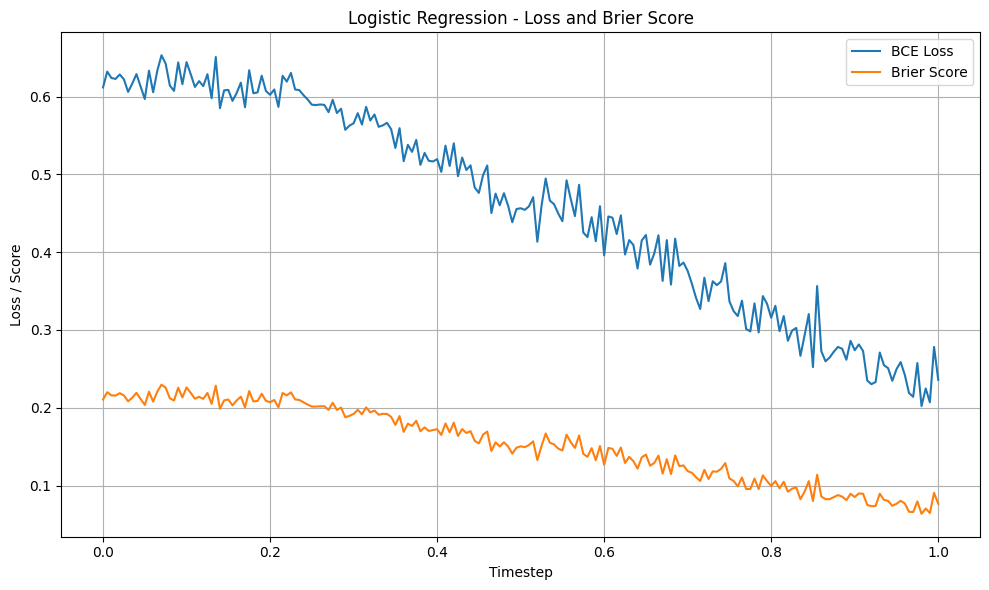

In [68]:
# # Test accuracy of model for each timestep on test data and plot
# accuracies = []
# timesteps = []
import process_data
# for timestep in test_data.keys():
#     print(timestep)
#     model = models[timestep]
#     # Convert test data to array
#     y_test = np.array([row["label"] for row in test_data[timestep]])
#     X_test = np.array([row["rows"].reshape(-1) for row in test_data[timestep]])
#     # Evaluate model using the pipeline (preprocessing + logistic regression)
#     test_accuracy = model.score(X_test, y_test)
#     print(f"Timestep {timestep:.2%}: Test Accuracy = {test_accuracy:.4f}")
#     accuracies.append(test_accuracy)
#     timesteps.append(timestep)

# plt.plot(timesteps, accuracies)
# plt.xlabel("Timestep")
# plt.ylabel("Accuracy")
# plt.title("Accuracy of Logistic Regression Model for Each Timestep")
# plt.show()
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")
# process_data.plot_accuracy(models, test_data, "Logistic Regression")

In [ ]:
# Save the model
import pickle
filename = 'logistic_regression_model.pickle'
pickle.dump(models, open(filename, 'wb'))

In [47]:
from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "LR_phat_b_model")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

# For Debugging Purposes